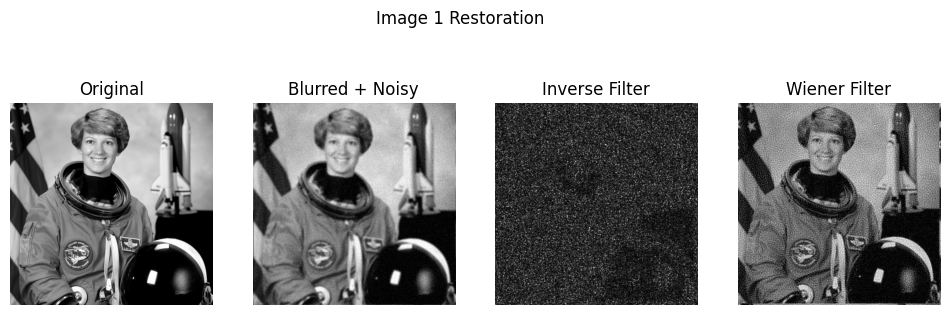

Comments on Image 1 restoration:
- Inverse Filter attempts direct deconvolution but amplifies noise heavily, leading to artifacts.
- Wiener Filter balances deconvolution and noise suppression, producing smoother, more natural restorations.

------------------------------------------------------------



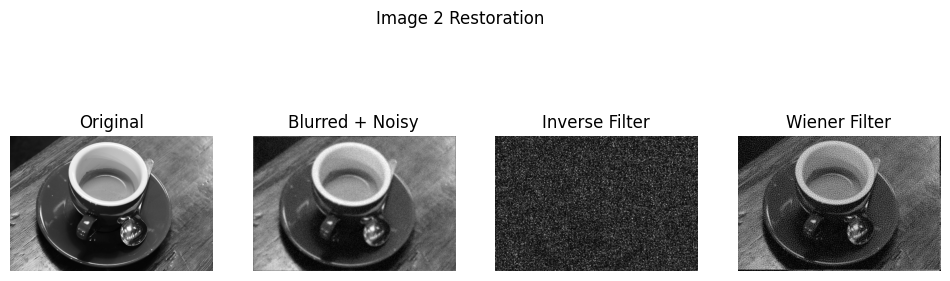

Comments on Image 2 restoration:
- Inverse Filter attempts direct deconvolution but amplifies noise heavily, leading to artifacts.
- Wiener Filter balances deconvolution and noise suppression, producing smoother, more natural restorations.

------------------------------------------------------------



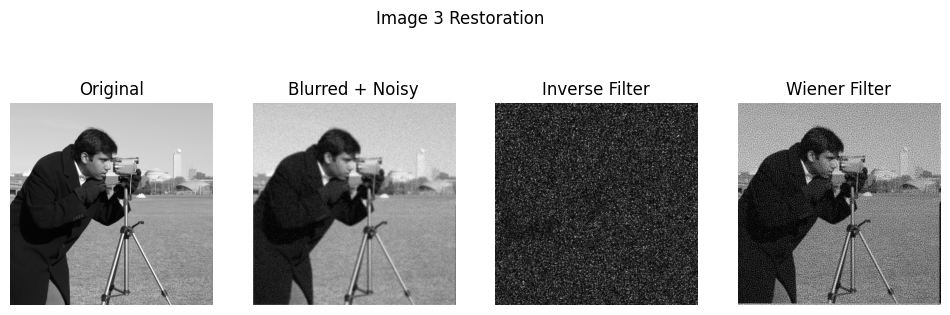

Comments on Image 3 restoration:
- Inverse Filter attempts direct deconvolution but amplifies noise heavily, leading to artifacts.
- Wiener Filter balances deconvolution and noise suppression, producing smoother, more natural restorations.

------------------------------------------------------------



In [1]:
# Install required packages (usually already installed in Colab)
!pip install scikit-image

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, util
from skimage.restoration import wiener
from scipy.signal import convolve2d
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# --- Helper functions ---

def add_blur_noise(image, kernel, noise_std=0.05):
    """Blur the image with kernel and add Gaussian noise."""
    blurred = convolve2d(image, kernel, mode='same', boundary='wrap')
    noisy = blurred + np.random.normal(0, noise_std, image.shape)
    noisy = np.clip(noisy, 0, 1)
    return noisy

def inverse_filter(degraded, kernel, eps=1e-3):
    """Inverse filter in frequency domain with epsilon to avoid division by zero."""
    H = fft2(kernel, s=degraded.shape)
    G = fft2(degraded)
    H_conj = np.conj(H)
    H_abs2 = np.abs(H)**2

    # Avoid division by zero
    H_abs2[H_abs2 < eps] = eps

    F_hat = G / H
    restored = np.abs(ifft2(F_hat))
    return restored

def wiener_filter(degraded, kernel, K=0.01):
    """Wiener filter in frequency domain."""
    H = fft2(kernel, s=degraded.shape)
    G = fft2(degraded)
    H_conj = np.conj(H)
    H_abs2 = np.abs(H)**2

    F_hat = (H_conj / (H_abs2 + K)) * G
    restored = np.abs(ifft2(F_hat))
    return restored

# --- Create synthetic dataset (3 sample images) ---

images = [
    color.rgb2gray(data.astronaut()),   # astronaut image, grayscale
    color.rgb2gray(data.coffee()),      # coffee image, grayscale
    data.camera()                       # classic camera image, grayscale
]

images = [util.img_as_float(im) for im in images]

# Blur kernel (simple Gaussian-like)
kernel_size = 9
sigma = 2
x = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
gauss_1d = np.exp(-x**2/(2*sigma**2))
gauss_1d /= gauss_1d.sum()
kernel = np.outer(gauss_1d, gauss_1d)

# Process each image
for idx, img in enumerate(images):
    # Degrade image by blur + noise
    degraded = add_blur_noise(img, kernel, noise_std=0.05)

    # Apply inverse filter
    inv_restored = inverse_filter(degraded, kernel, eps=1e-3)

    # Apply Wiener filter
    wiener_restored = wiener_filter(degraded, kernel, K=0.01)

    # Plot results
    plt.figure(figsize=(12,4))
    plt.suptitle(f'Image {idx+1} Restoration')

    plt.subplot(1,4,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(degraded, cmap='gray')
    plt.title('Blurred + Noisy')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(inv_restored, cmap='gray')
    plt.title('Inverse Filter')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(wiener_restored, cmap='gray')
    plt.title('Wiener Filter')
    plt.axis('off')

    plt.show()

    # Comments:
    print(f"Comments on Image {idx+1} restoration:")
    print("- Inverse Filter attempts direct deconvolution but amplifies noise heavily, leading to artifacts.")
    print("- Wiener Filter balances deconvolution and noise suppression, producing smoother, more natural restorations.")
    print("\n" + "-"*60 + "\n")
